In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba_initial

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,games,games_started,PER,FTr,AST,STL,TRB,FT,3P,FG
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,82.0,82.0,29.4,0.355,352.0,180.0,543.0,548.0,111.0,916.0
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,63.0,62.0,17.9,0.306,170.0,62.0,580.0,152.0,1.0,347.0
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,76.0,76.0,20.1,0.467,253.0,77.0,214.0,430.0,168.0,504.0
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,54.0,52.0,26.4,0.495,155.0,34.0,596.0,249.0,1.0,592.0
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,81.0,81.0,19.6,0.240,608.0,231.0,339.0,229.0,98.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11578,Paul Watson,2019,"$79,568","$84,399",1994-12-30,2020.0,G,6-6,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11579,Jarrell Brantley,2019,"$79,568","$84,399",1996-06-07,2020.0,F,6-5,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11580,Justin Wright-Foreman,2019,"$79,568","$84,399",1997-10-27,2020.0,G,6-0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11581,Garrison Mathews,2019,"$79,568","$84,399",1996-10-24,2020.0,G,6-5,215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nba = nba_initial.dropna()
nba

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,games,games_started,PER,FTr,AST,STL,TRB,FT,3P,FG
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,82.0,82.0,29.4,0.355,352.0,180.0,543.0,548.0,111.0,916.0
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,63.0,62.0,17.9,0.306,170.0,62.0,580.0,152.0,1.0,347.0
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,76.0,76.0,20.1,0.467,253.0,77.0,214.0,430.0,168.0,504.0
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,54.0,52.0,26.4,0.495,155.0,34.0,596.0,249.0,1.0,592.0
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,81.0,81.0,19.6,0.240,608.0,231.0,339.0,229.0,98.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250","$85,683",1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,18.0,0.0,14.4,0.352,7.0,8.0,33.0,14.0,3.0,23.0
10465,James Young,2017,"$77,250","$85,683",1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,29.0,0.0,10.0,0.155,4.0,10.0,26.0,6.0,12.0,25.0
10471,Darrun Hilliard,2017,"$77,250","$85,683",1993-04-13,2016.0,G,6-6,205.0,381.0,...,39.0,1.0,5.9,0.222,33.0,11.0,33.0,21.0,12.0,47.0
10481,Jonathan Gibson,2017,"$74,158","$82,253",1987-11-08,2017.0,G,6-2,185.0,231.0,...,17.0,0.0,9.5,0.305,26.0,8.0,22.0,21.0,15.0,35.0


In [4]:
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace(',', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].astype(int)
nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
nba

C:\Users\riyaag\AppData\Local\Temp\ipykernel_23996\703286028.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
C:\Users\riyaag\AppData\Local\Temp\ipykernel_23996\703286028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
C:\Users\riyaag\AppData\Local\Temp\ipykernel_23996\703286028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,games_started,PER,FTr,AST,STL,TRB,FT,3P,FG,inflationAdjSalary_log
0,Michael Jordan,1996,"$30,140,000",52258566,1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,82.0,29.4,0.355,352.0,180.0,543.0,548.0,111.0,916.0,17.771714
1,Horace Grant,1996,"$14,857,000",25759971,1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,62.0,17.9,0.306,170.0,62.0,580.0,152.0,1.0,347.0,17.064332
2,Reggie Miller,1996,"$11,250,000",19505934,1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,76.0,20.1,0.467,253.0,77.0,214.0,430.0,168.0,504.0,16.786229
3,Shaquille O'Neal,1996,"$10,714,000",18576585,1972-03-06,1993.0,C,7-1,325.0,1946.0,...,52.0,26.4,0.495,155.0,34.0,596.0,249.0,1.0,592.0,16.737412
4,Gary Payton,1996,"$10,212,000",17706187,1968-07-23,1991.0,G,6-4,180.0,3162.0,...,81.0,19.6,0.240,608.0,231.0,339.0,229.0,98.0,618.0,16.689425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250",85683,1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,0.0,14.4,0.352,7.0,8.0,33.0,14.0,3.0,23.0,11.358410
10465,James Young,2017,"$77,250",85683,1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,0.0,10.0,0.155,4.0,10.0,26.0,6.0,12.0,25.0,11.358410
10471,Darrun Hilliard,2017,"$77,250",85683,1993-04-13,2016.0,G,6-6,205.0,381.0,...,1.0,5.9,0.222,33.0,11.0,33.0,21.0,12.0,47.0,11.358410
10481,Jonathan Gibson,2017,"$74,158",82253,1987-11-08,2017.0,G,6-2,185.0,231.0,...,0.0,9.5,0.305,26.0,8.0,22.0,21.0,15.0,35.0,11.317555


In [5]:
#cols: MP(minutes played), PTS(points), Age, team, games(games played), games_started, PER(player efficiency rating),
# FTr(free throw rating), AST(assists), STL(steals), TRB(total rebounds), FT(free throws), 3P(three points), FG(field goals)
X = nba[['MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
y = nba[['inflationAdjSalary_log']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.735500827308309, R2: 0.42720490695853697


Text(0.5, 1.0, 'Residual Plot for Linear Regression')

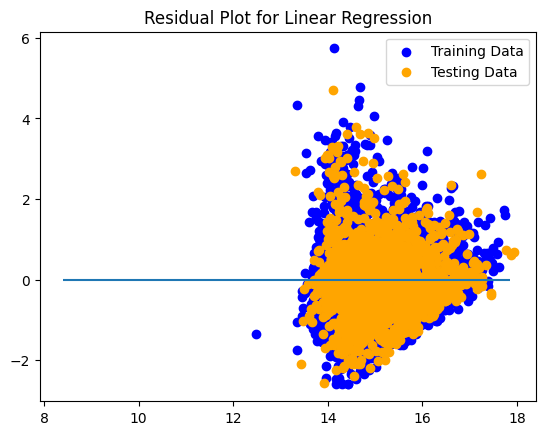

In [9]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Regression")

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
                'alpha': sp_randFloat(0.00001, 0.001),
                'max_iter': sp_randInt(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': sp_randFloat(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train.values.reshape((-1,)))
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=0.00022734276336268156, eta0=0.009794737266228447,
             learning_rate='adaptive', max_iter=1169)

 The best score across ALL searched params:
 -3.5363766375414206e+22

 The best parameters across ALL searched params:
 {'alpha': 0.00022734276336268156, 'eta0': 0.009794737266228447, 'learning_rate': 'adaptive', 'max_iter': 1169}


In [11]:
sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
                            learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# sgdregressor = SGDRegressor()
sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
y_pred_sgd = sgdregressor.predict(X_test)

In [12]:
MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"MSE: {MSE_sgd}, R2: {r2_sgd}")

MSE: 3.3009390962415226e+23, R2: -2.570713242669531e+23


Text(0.5, 1.0, 'Residual Plot for SGDRegressor')

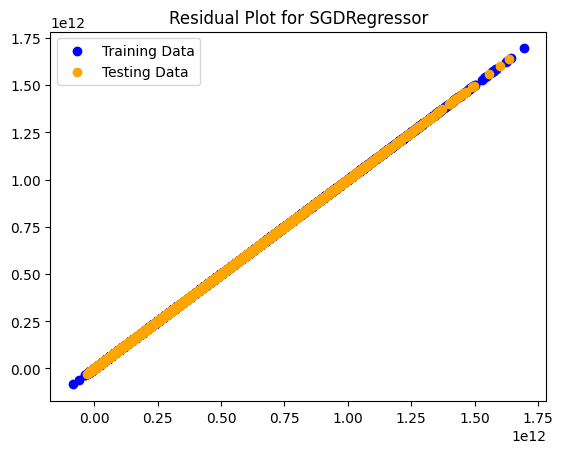

In [13]:
plt.scatter(sgdregressor.predict(X_train), sgdregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(sgdregressor.predict(X_test), sgdregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for SGDRegressor")

In [14]:
from sklearn.linear_model import Lasso

parameters = {
                'alpha': sp_randFloat(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
lassoregressor.fit(X_train, y_train)  
y_pred_lasso = lassoregressor.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}")


 The best parameters across ALL searched params:
 {'alpha': 0.6372269613185144}
MSE: 0.7703671827457506, R2: 0.40005160329755496


Text(0.5, 1.0, 'Residual Plot for Linear Model with L1 regularization')

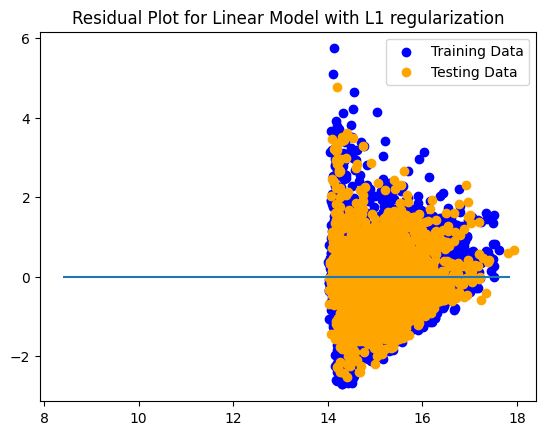

In [15]:
plt.scatter(lassoregressor.predict(X_train), lassoregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassoregressor.predict(X_test), lassoregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with L1 regularization")

In [16]:
from sklearn.linear_model import Ridge

parameters = {
                'alpha': sp_randFloat(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
ridgeregressor.fit(X_train, y_train)  
y_pred_ridge = ridgeregressor.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}")


 The best parameters across ALL searched params:
 {'alpha': 8.178539700705164}
MSE: 0.7355006955903448, R2: 0.4272050095381682


Text(0.5, 1.0, 'Residual Plot for Linear Model with Ridge regularization')

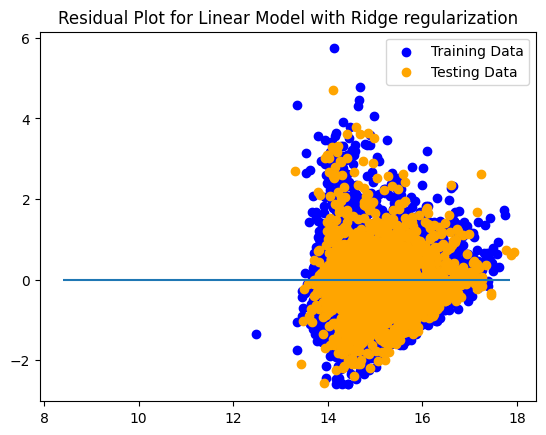

In [17]:
plt.scatter(ridgeregressor.predict(X_train), ridgeregressor.predict(X_train) - y_train.values, c="blue", label="Training Data")
plt.scatter(ridgeregressor.predict(X_test), ridgeregressor.predict(X_test) - y_test.values, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")

In [18]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}")

MSE: 0.7678163619966389, R2: 0.4020381375801425


C:\Users\riyaag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Residual Plot for LassoCV model')

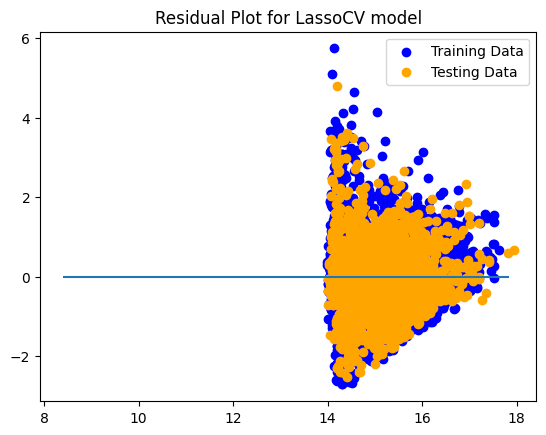

In [19]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for LassoCV model")